# Template notebook

It's good to start with an introduction, to set the scene and introduce your audience to the data, and the problem you're solving as a team.

<br>

## Libraries
As always, we'll start by importing the necessary libraries.

In [8]:
# It's good practice to add comments to explain your code 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load in the data

In [9]:
data = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")

/tmp/ipykernel_103/3136814928.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")


In [10]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other


## EDA

In [11]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
               cough          fever    sore_throat  shortness_of_breath  \
count  278596.000000  278596.000000  278847.000000        278847.000000   
mean        0.151574       0.078077       0.006907             0.005655   
std         0.358608       0.268294       0.082821             0.074990   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         1.000000       1.000000       1.000000             1.000000   

           head_ache  
count  278847.000000  
mean        0.008657  
std         0.092640  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


In [12]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
test_date                   0
cough                     252
fever                     252
sore_throat                 1
shortness_of_breath         1
head_ache                   1
corona_result               0
age_60_and_above       127320
gender                  19563
test_indication             0
dtype: int64


In [13]:
# Data types of each column
print("\nData types of each column:")
print(data.dtypes)



Data types of each column:
test_date               object
cough                  float64
fever                  float64
sore_throat            float64
shortness_of_breath    float64
head_ache              float64
corona_result           object
age_60_and_above        object
gender                  object
test_indication         object
dtype: object


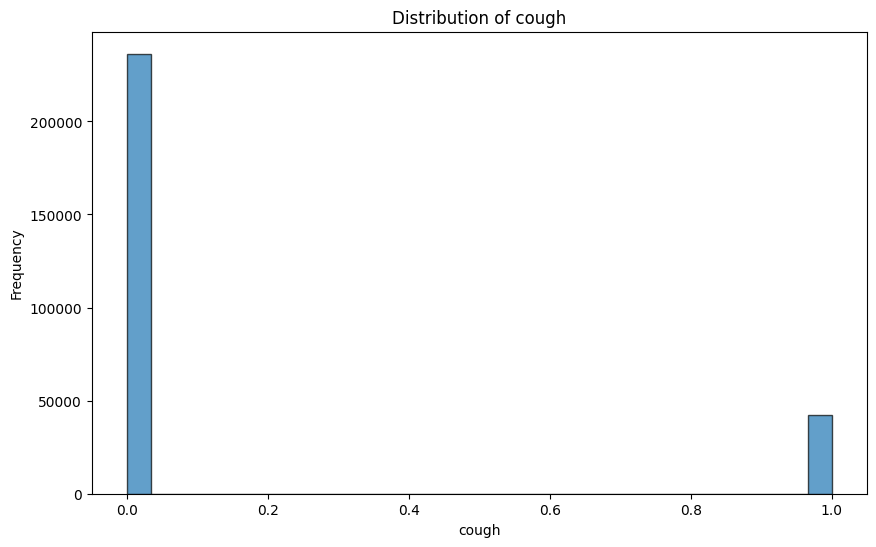

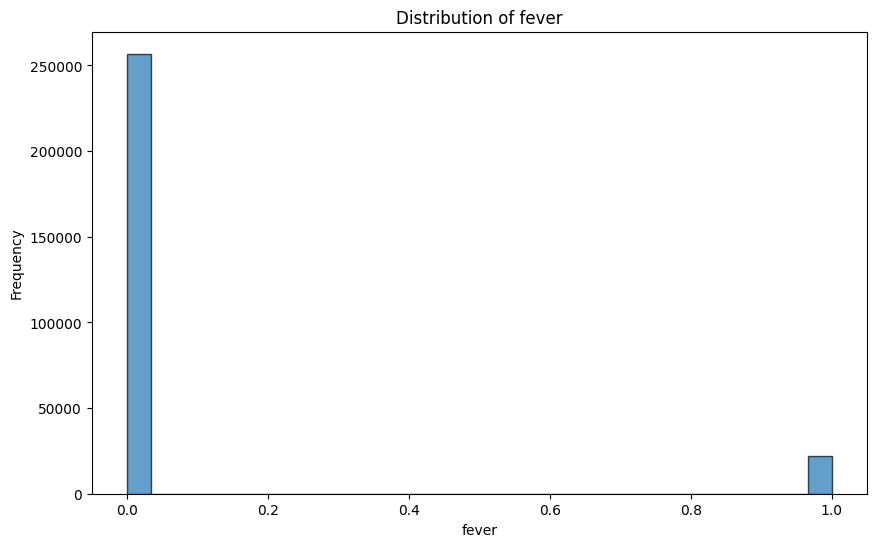

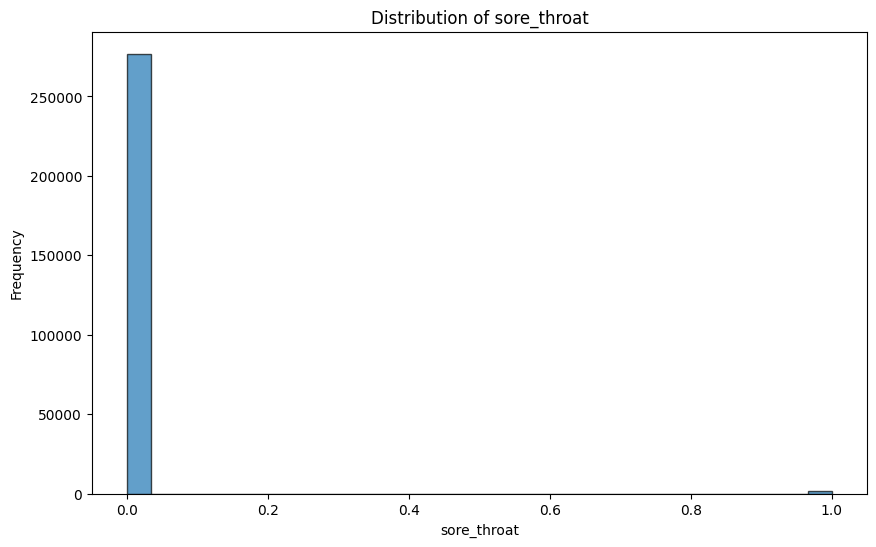

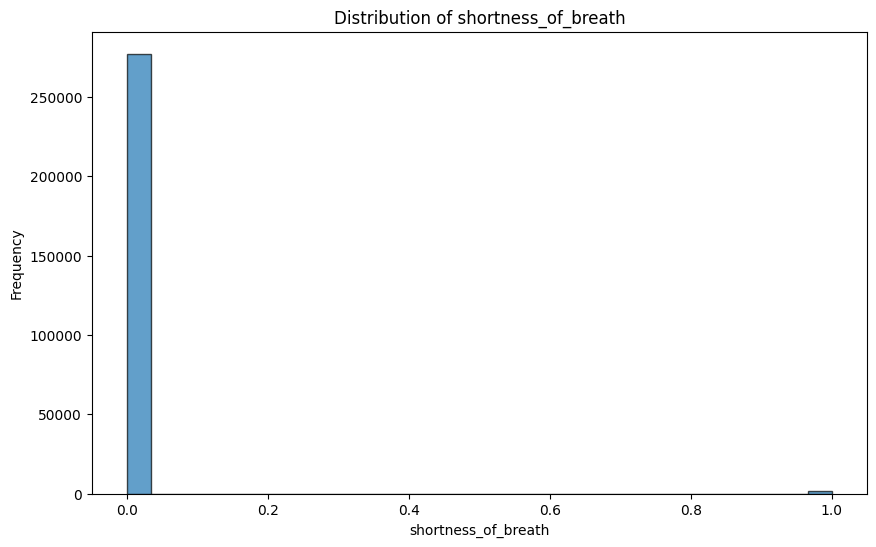

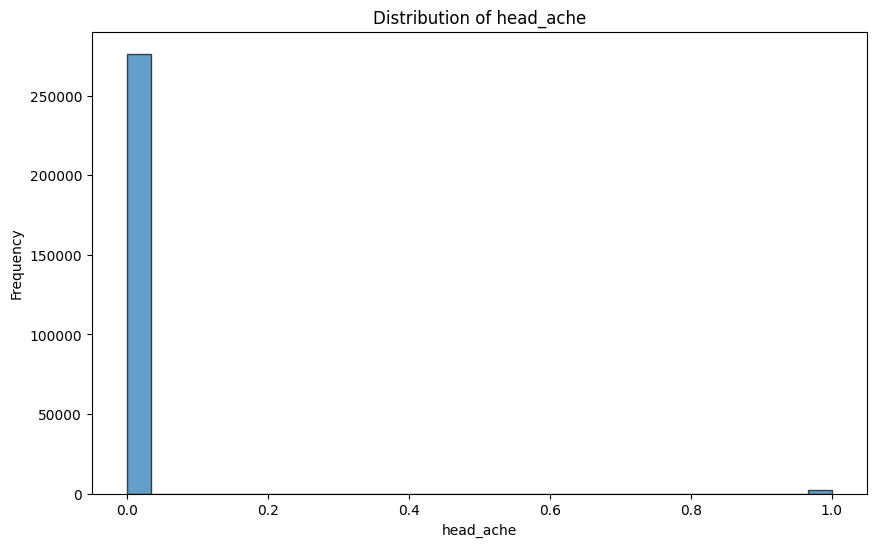

In [14]:
# Plot spread of numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
# Numerical columns are really numeric categorical columns (0/1 values)

In [15]:
categorical_columns = ['corona_result', 'age_60_and_above', 'gender', 'test_indication']

for column in categorical_columns:
    print(f"\nValue counts for {column}:")
    print(data[column].value_counts())


Value counts for corona_result:
corona_result
negative    260227
positive     14729
other         3892
Name: count, dtype: int64

Value counts for age_60_and_above:
age_60_and_above
No     125703
Yes     25825
Name: count, dtype: int64

Value counts for gender:
gender
female    130158
male      129127
Name: count, dtype: int64

Value counts for test_indication:
test_indication
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64


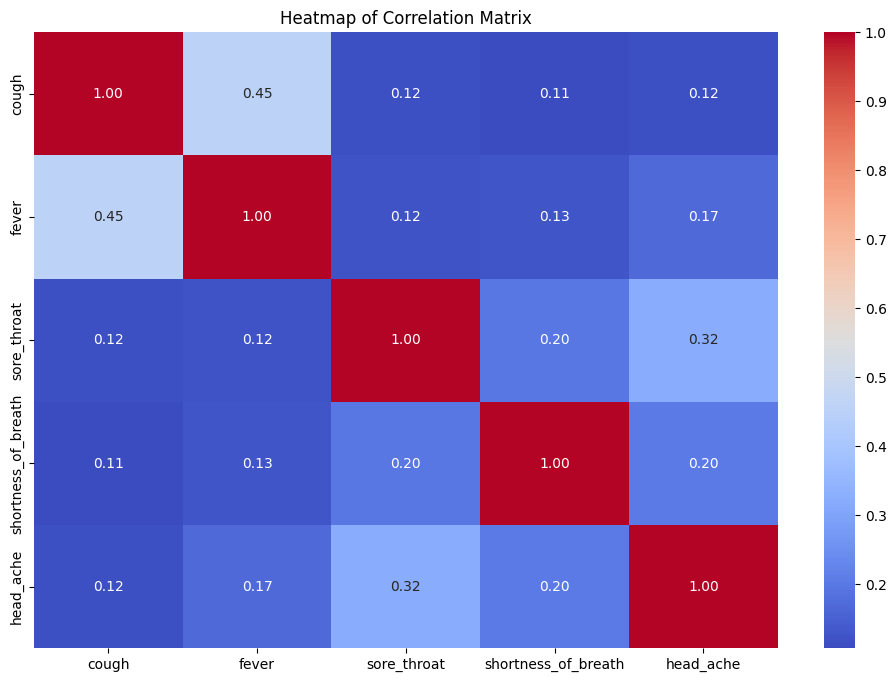

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()



In [17]:
#Group by 'corona_result' and calculate mean of numerical columns
grouped_df = data.groupby('corona_result')[numerical_columns].mean()
display(grouped_df)



,cough,fever,sore_throat,shortness_of_breath,head_ache
corona_result,,,,,
negative,0.134561,0.060829,0.001406,0.001479,0.000569
other,0.168808,0.096865,0.008736,0.007194,0.007965
positive,0.448013,0.378266,0.103612,0.079033,0.151752


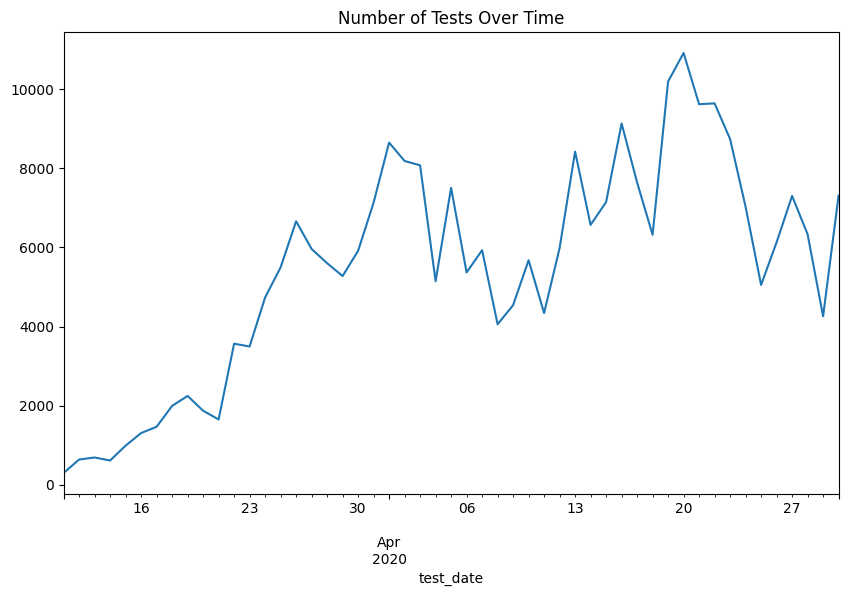

In [18]:
data['test_date'] = pd.to_datetime(data['test_date'])
data.set_index('test_date', inplace=True)

#Plotting the number of tests over time
data['test_count'] = 1
data['test_count'].resample('D').sum().plot(figsize=(10, 6))
plt.title('Number of Tests Over Time')
plt.show()


## Pre-Processing 

In [19]:
df = data.copy()
df = df.dropna(subset=['sore_throat', 'shortness_of_breath', 'head_ache'])
df.isna().sum()

cough                     251
fever                     251
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       127319
gender                  19562
test_indication             0
test_count                  0
dtype: int64

In [ ]:
# now one hot encode age 60 and gender
df['age_60_and_above'] = df['age_60_and_above'].fillna('missing')
df['gender'] = df['gender'].fillna('missing')
df['cough'] = df['cough'].fillna('missing')
df['fever'] = df['fever'].fillna('missing')

one_hot_encoded_data = pd.get_dummies(df, columns = ['age_60_and_above','gender','cough','fever'])
#display(one_hot_encoded_data.sample(10))
one_hot_encoded_data.isna().sum()

## Model

### Logistic Regression
For this basic model, we do not need date of the test taken.


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
dataset = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")

/tmp/ipykernel_103/978604951.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv")


In [24]:
dataset = dataset.drop(columns = ['test_date'])
dataset2 = dataset.dropna(subset=['sore_throat', 'shortness_of_breath', 'head_ache'])
dataset2.isna().sum()

cough                     251
fever                     251
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       127319
gender                  19562
test_indication             0
dtype: int64

In [25]:
# impute missing values
dataset2['age_60_and_above'] = dataset2['age_60_and_above'].fillna('missing')
dataset2['gender'] = dataset2['gender'].fillna('missing')
dataset2['cough'] = dataset2['cough'].fillna('missing')
dataset2['fever'] = dataset2['fever'].fillna('missing')

In [41]:
one_hot_encoded_data = pd.get_dummies(dataset2, columns = ['age_60_and_above','gender','cough','fever','test_indication'])

In [42]:
one_hot_encoded_data

,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above_No,age_60_and_above_Yes,gender_female,gender_male,cough_0.0,cough_1.0,fever_0.0,fever_1.0,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,0.0,0.0,0.0,negative,False,False,True,False,True,False,True,False,False,False,True
1,0.0,0.0,0.0,negative,False,False,True,False,False,True,True,False,False,False,True
2,0.0,0.0,0.0,negative,False,False,False,True,True,False,False,True,False,False,True
3,0.0,0.0,0.0,negative,False,False,True,False,False,True,True,False,False,False,True
4,0.0,0.0,0.0,negative,False,False,False,True,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,0.0,0.0,0.0,negative,False,False,False,False,True,False,True,False,False,False,True
278844,0.0,0.0,0.0,negative,False,False,False,False,True,False,True,False,False,False,True
278845,0.0,0.0,0.0,positive,False,False,False,False,True,False,True,False,False,True,False
278846,0.0,0.0,0.0,other,False,False,False,False,True,False,True,False,False,False,True


In [43]:
encoded_data2 = one_hot_encoded_data[one_hot_encoded_data['corona_result'] != 'other']

In [44]:
# split the data according to x and y
# features and target
x = encoded_data2.drop(columns = ['corona_result'])
y = encoded_data2['corona_result']

In [45]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9635940426615265
Confusion Matrix:
[[51480   545]
 [ 1457  1509]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.97      0.99      0.98     52025
    positive       0.73      0.51      0.60      2966

    accuracy                           0.96     54991
   macro avg       0.85      0.75      0.79     54991
weighted avg       0.96      0.96      0.96     54991



In [47]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                                   Feature  Importance
2                                head_ache    4.499565
0                              sore_throat    2.905058
1                      shortness_of_breath    2.584950
12  test_indication_Contact with confirmed    2.303707
4                     age_60_and_above_Yes    1.107143
3                      age_60_and_above_No    0.564850
6                              gender_male    0.400186
10                               fever_1.0    0.248027
5                            gender_female    0.130196
8                                cough_1.0   -0.481132
7                                cough_0.0   -0.513326
9                                fever_0.0   -1.238391
11                  test_indication_Abroad   -1.470387
13                   test_indication_Other   -1.909345


**Question / Task 1**

Insert context about question / task 1 here.

In [ ]:
# Add your code here
